In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
data = pd.read_csv(r'C:\Users\HP\Pandas_codegym\Phân tích bộ dữ liệu Online_retailer\OnlineRetail.csv',encoding= 'unicode_escape')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Bộ dữ liệu Online Retail mô tả tình hình kinh doanh của một doanh nghiệp bán hàng Online mà bạn đã được làm quen từ buổi 1. Yêu cầu:<br>
- Phát hiện các dòng, cột chứa dữ liệu khuyết thiếu<br>
- Có nên xóa hết các dòng chứa dữ liệu khuyết thiếu, giải thích vì sao<br>
- Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của thuộc tính Description bằng giá trị mặc định “Không biết”<br>

In [46]:
data.isnull().sum().sort_values(ascending=True)

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
Description      1454
CustomerID     135080
dtype: int64

In [47]:
data['Description'].fillna(value='Không biết', inplace=True)

data[data['Description']=='Không biết']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,Không biết,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,Không biết,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,Không biết,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,Không biết,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,Không biết,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,Không biết,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,Không biết,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,Không biết,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,Không biết,27,12/8/2011 10:33,0.0,NaN,United Kingdom


- Thực hiện phát hiện giá trị ngoại lai của thuộc tính Quantity và Thuộc tính UnitPrice<br>
- Tiến hành lọc riêng bộ dữ liệu chứa giá trị ngoại lai và bộ dữ liệu sạch<br>
- Mô tả thông tin của bộ dữ liệu trên và nhận xét<br>

<AxesSubplot:>

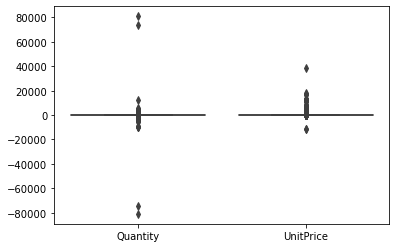

In [48]:
df = data[['Quantity', 'UnitPrice']]
#Phân tích hình ảnh
sns.boxplot(data=df)

<AxesSubplot:ylabel='Density'>

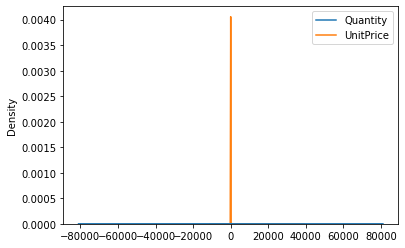

In [49]:
sns.kdeplot(data=df)

In [50]:
data_not_contain_oulier = data[(data['Quantity']>=0)]
data_not_contain_oulier = data_not_contain_oulier[(data_not_contain_oulier['UnitPrice']>=0)]
data_not_contain_oulier.drop_duplicates(subset='InvoiceNo', keep ='first', inplace=True)
data_not_contain_oulier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom
25,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,12/9/2011 12:23,1.45,13777.0,United Kingdom
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,12/9/2011 12:25,0.72,13777.0,United Kingdom
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,12/9/2011 12:31,0.39,15804.0,United Kingdom
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom


In [51]:
Q1 = data_not_contain_oulier['Quantity'].quantile(0.25)
Q3 = data_not_contain_oulier['Quantity'].quantile(0.75)
IQR = Q3 - Q1
#bộ dữ liệu có giá trị ngoại lai
# data_oulier = 
data_not_contain_oulier['Outliner'] = (data_not_contain_oulier['Quantity']< Q1-1.5*IQR)|(data_not_contain_oulier['Quantity']>Q3+1.5*IQR)
data_not_contain_oulier=data_not_contain_oulier[data_not_contain_oulier['Outliner']==False]
data_not_contain_oulier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Outliner
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,False
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,False
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,False
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom,False
25,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047.0,United Kingdom,False
...,...,...,...,...,...,...,...,...,...
541863,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,12/9/2011 12:21,2.08,17581.0,United Kingdom,False
541865,581583,20725,LUNCH BAG RED RETROSPOT,40,12/9/2011 12:23,1.45,13777.0,United Kingdom,False
541869,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,12/9/2011 12:31,0.39,15804.0,United Kingdom,False
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,False


<AxesSubplot:ylabel='Density'>

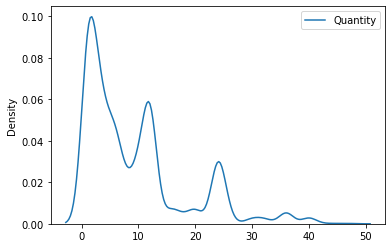

In [52]:
sns.kdeplot(data=data_not_contain_oulier[['Quantity']])

<AxesSubplot:>

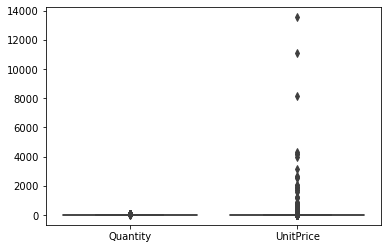

In [53]:
sns.boxplot(data=data_not_contain_oulier[['Quantity','UnitPrice']])